# Importing The Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from tqdm import tqdm
sns.set(style = 'whitegrid')
%matplotlib inline

# Load the dataset

In [2]:
pd.set_option('display.max_columns', 100)
encode_latin = 'latin'
train = pd.read_csv('D:/DataSets/Health Insurance Cross Sell Prediction 🏠 🏥/train.csv', low_memory = False, encoding = encode_latin)
test = pd.read_csv('D:/DataSets/Health Insurance Cross Sell Prediction 🏠 🏥/test.csv', low_memory = False, encoding = encode_latin)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [4]:
train.shape

(381109, 12)

### Check the missing values

In [5]:
train.isnull().any()

id                      False
Gender                  False
Age                     False
Driving_License         False
Region_Code             False
Previously_Insured      False
Vehicle_Age             False
Vehicle_Damage          False
Annual_Premium          False
Policy_Sales_Channel    False
Vintage                 False
Response                False
dtype: bool

In [6]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [9]:
# Assign the numerical columns & categorical columns separately

num_col = ['Age', 'Region_Code','Annual_Premium','Vintage']
cat_col = ['Gender','Driving_License','Previously_Insured','Vehicle_Age','Vehicle_Damage','Response']

In [10]:
num_col

['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

In [11]:
cat_col

['Gender',
 'Driving_License',
 'Previously_Insured',
 'Vehicle_Age',
 'Vehicle_Damage',
 'Response']

In [12]:
train[num_col].describe()

,Age,Region_Code,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,26.388807,30564.389581,154.347397
std,15.511611,13.229888,17213.155057,83.671304
min,20.000000,0.000000,2630.000000,10.000000
25%,25.000000,15.000000,24405.000000,82.000000
50%,36.000000,28.000000,31669.000000,154.000000
75%,49.000000,35.000000,39400.000000,227.000000
max,85.000000,52.000000,540165.000000,299.000000


# Visualize the Target data

Response

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

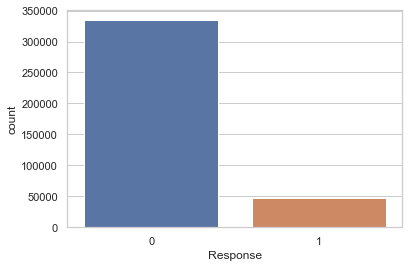

In [13]:
sns.countplot(train.Response)

In [14]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Age Distribution of Customers

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

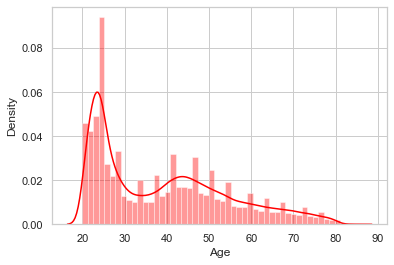

In [15]:
sns.distplot(train.Age, color="red")

<AxesSubplot:ylabel='Age'>

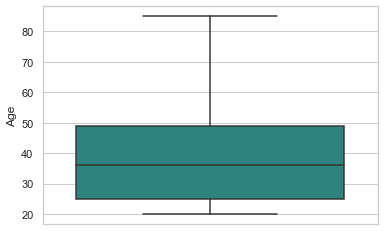

In [16]:
sns.boxplot(y = 'Age', data = train, palette = 'viridis')

Age Vs Annual premium

<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

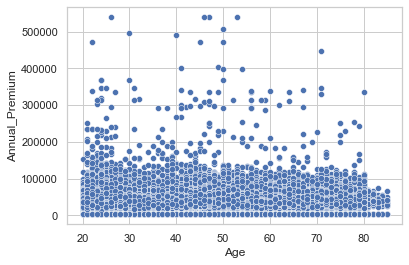

In [17]:
sns.scatterplot(x=train['Age'],y=train['Annual_Premium'])

Gender

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

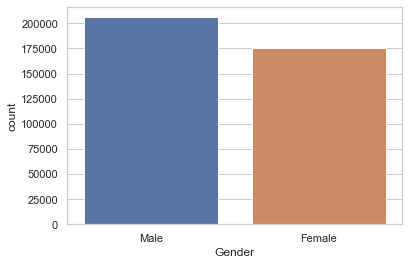

In [18]:
sns.countplot(train.Gender)

In [19]:
df = train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

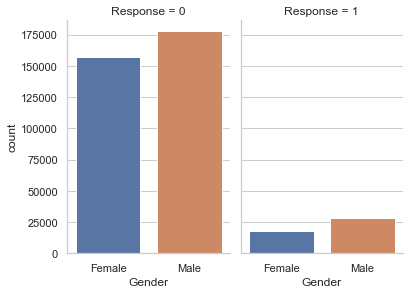

In [20]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

Driving license by Gender

In [21]:
df = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()

In [22]:
df

,Gender,Driving_License
0,Female,175020
1,Male,206089


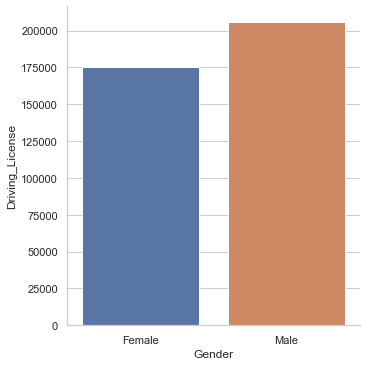

In [23]:
sns.catplot(x="Gender", y="Driving_License",
                data=df, kind="bar");

Customers having Vehicle insurance already

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

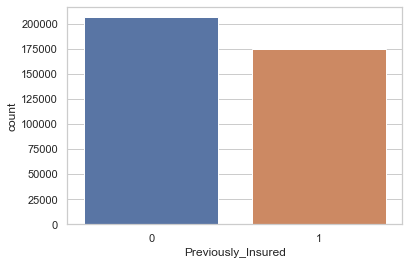

In [24]:
sns.countplot(train.Previously_Insured)

Vehicle Age

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

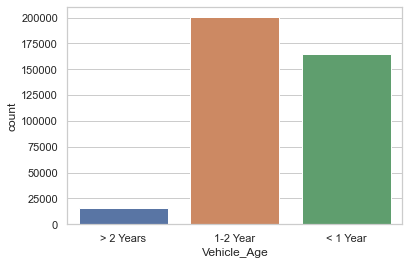

In [25]:
sns.countplot(train.Vehicle_Age)

Response and Vehicle age

In [26]:
df=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
df

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


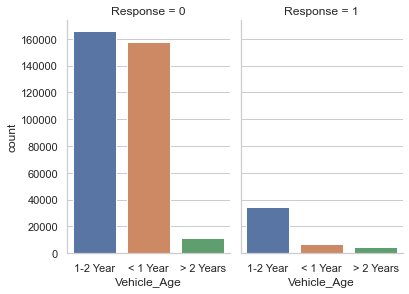

In [27]:
g = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

Customers having damaged vehicle

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

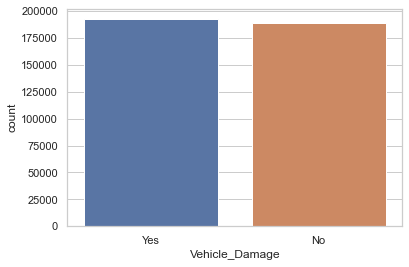

In [28]:
sns.countplot(train.Vehicle_Damage)

Damage Vehicle and Response

In [29]:
df=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()

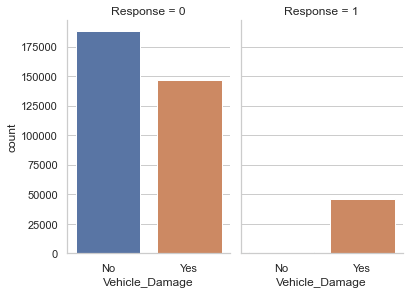

In [30]:
g = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=df, kind="bar",
                height=4, aspect=.7);

Annual Premium Distribution

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Premium', ylabel='Density'>

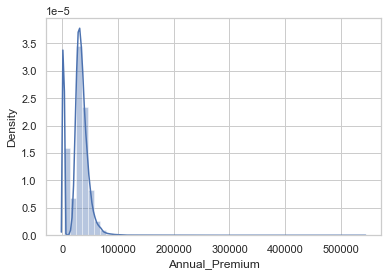

In [31]:
sns.distplot(train.Annual_Premium)

<AxesSubplot:ylabel='Annual_Premium'>

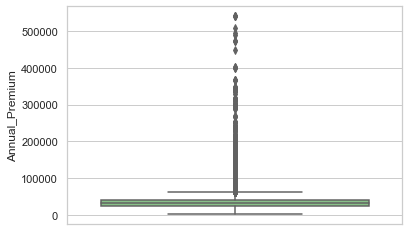

In [32]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')

Vintage

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

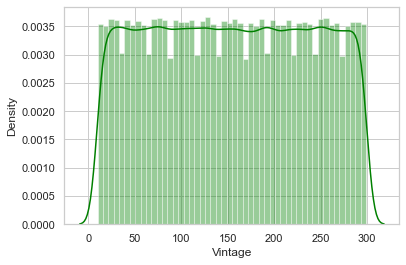

In [33]:
sns.distplot(train.Vintage, color = 'green')

# Feature Engineering & Data Preprocessing 

In [34]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year','Vehicle_Age_gt_2_Years','Vehicle_Damage_Yes','Region_Code','Policy_Sales_Channel']

Map the gender Male & Female into 0 & 1

In [35]:
train['Gender'] = train['Gender'].map({'Female':0, 'Male':1}).astype(int)
train['Gender']

0         1
1         1
2         1
3         1
4         0
         ..
381104    1
381105    1
381106    1
381107    0
381108    1
Name: Gender, Length: 381109, dtype: int32

In [36]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [37]:
train = pd.get_dummies(train, drop_first = True)
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,1,1,44,1,28.0,0,40454.0,26.0,217,1,0,1,1
1,2,1,76,1,3.0,0,33536.0,26.0,183,0,0,0,0
2,3,1,47,1,28.0,0,38294.0,26.0,27,1,0,1,1
3,4,1,21,1,11.0,1,28619.0,152.0,203,0,1,0,0
4,5,0,29,1,41.0,1,27496.0,152.0,39,0,1,0,0


In [38]:
# Rename the certain columns
train=train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
train['Vehicle_Age_lt_1_Year']=train['Vehicle_Age_lt_1_Year'].astype('int')
train['Vehicle_Age_gt_2_Years']=train['Vehicle_Age_gt_2_Years'].astype('int')
train['Vehicle_Damage_Yes']=train['Vehicle_Damage_Yes'].astype('int')

In [39]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
train[num_feat] = ss.fit_transform(train[num_feat])
mm = MinMaxScaler()
train[['Annual_Premium']] = mm.fit_transform(train[['Annual_Premium']])

In [40]:
train=train.drop('id',axis=1)

In [41]:
for column in cat_feat:
    train[column] = train[column].astype('str')

In [42]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_lt_1_Year,Vehicle_Age_gt_2_Years,Vehicle_Damage_Yes
0,1,0.333777,1,28.0,0,0.070366,26.0,0.748795,1,0,1,1
1,1,2.396751,1,3.0,0,0.057496,26.0,0.342443,0,0,0,0
2,1,0.527181,1,28.0,0,0.066347,26.0,-1.521998,1,0,1,1
3,1,-1.148985,1,11.0,1,0.048348,152.0,0.581474,0,1,0,0
4,0,-0.633242,1,41.0,1,0.046259,152.0,-1.378580,0,1,0,0


# Split the Dataset into Train & Test

In [43]:
from sklearn.model_selection import train_test_split

train_target=train['Response']
train=train.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [44]:
id=test.id

In [45]:
test=test.drop('id',axis=1)

In [46]:
x_train.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage',
       'Vehicle_Age_lt_1_Year', 'Vehicle_Age_gt_2_Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

# Model Building & Evaluation

## Import the Required Packages

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from scipy.stats import randint
import pickle
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# import packages for hyperparameters tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report

## Random Forest Classifier 

In [52]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Devmallya Karar\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['test', 'fmin', 'randint']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [53]:
x_train.dtypes

Gender                     object
Age                       float64
Driving_License            object
Region_Code                object
Previously_Insured         object
Annual_Premium            float64
Policy_Sales_Channel       object
Vintage                   float64
Vehicle_Age_lt_1_Year      object
Vehicle_Age_gt_2_Years     object
Vehicle_Damage_Yes         object
dtype: object

In [54]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(x_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 16.0min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 10],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [300]},
                   random_state=101, verbose=1)

## Save the Model 

In [55]:
filename = 'rf_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [56]:
filename = 'rf_model.sav'

In [57]:
rf_load = pickle.load(open(filename, 'rb'))

## Evaluate the Model

In [58]:
y_pred = model.predict(x_test)

## Classification Report

In [59]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278



C:\Users\Devmallya Karar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC Curve & AUC of Random forest classifier

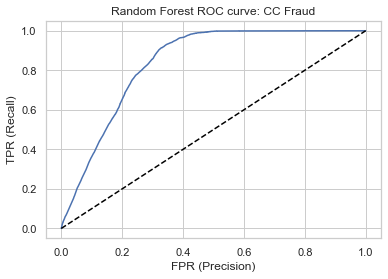

Area under curve (AUC):  0.8378909320103954


In [60]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('Random Forest ROC curve: CC Fraud')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [61]:
roc_auc_score(y_test, y_score)

0.8378909320103954

## XGBoost Classifier

In [63]:
for column in cat_feat:
    x_train[column] = x_train[column].astype('float')
    x_test[column] = x_test[column].astype('float')

<ipython-input-63-6e5505036f8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[column] = x_train[column].astype('float')
<ipython-input-63-6e5505036f8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[column] = x_test[column].astype('float')


In [64]:
space={ 'max_depth': hp.quniform("max_depth", 3,18,1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 300,
        'seed': 0
      }

In [65]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]
    accuracy = accuracy_score(y_test, pred>0.5)
    Roc_Auc_Score = roc_auc_score(y_test, y_score)
    print ("ROC-AUC Score:",Roc_Auc_Score)
    print ("SCORE:", accuracy)
    return {'loss': -Roc_Auc_Score, 'status': STATUS_OK }

In [66]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
trials = Trials()

In [67]:
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
  1%|▍                                              | 1/100 [00:12<20:19, 12.32s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
  2%|▉                                              | 2/100 [00:23<19:39, 12.04s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
  3%|█▍                                             | 3/100 [00:38<20:52, 12.91s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
  4%|█▉                                             | 4/100 [00:55<22:37, 14.14s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
  5%|██▎                                            | 5/100 [01:10<22:51, 14.44s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
  6%|██▊                                            | 6/100 [01:32<26:05, 16.66s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
  7%|███▎                                           | 7/100 [01:50<26:17, 16.96s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
  8%|███▊                                           | 8/100 [02:07<25:59, 16.95s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
  9%|████▏                                          | 9/100 [02:21<24:42, 16.30s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877400869035874                                                                                                      
 10%|████▌                                         | 10/100 [02:43<26:47, 17.86s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 11%|█████                                         | 11/100 [02:56<24:27, 16.49s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 12%|█████▌                                        | 12/100 [03:13<24:15, 16.54s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 13%|█████▉                                        | 13/100 [03:26<22:38, 15.62s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 14%|██████▍                                       | 14/100 [03:40<21:36, 15.08s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 15%|██████▉                                       | 15/100 [03:58<22:20, 15.77s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 16%|███████▎                                      | 16/100 [04:11<21:14, 15.18s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 17%|███████▊                                      | 17/100 [04:26<20:35, 14.89s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 18%|████████▎                                     | 18/100 [04:41<20:37, 15.09s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 19%|████████▋                                     | 19/100 [05:00<21:55, 16.23s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 20%|█████████▏                                    | 20/100 [05:14<20:52, 15.66s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774113646382166                                                                                                     
 21%|█████████▋                                    | 21/100 [05:36<22:58, 17.45s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 22%|██████████                                    | 22/100 [05:48<20:38, 15.88s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 23%|██████████▌                                   | 23/100 [06:01<19:14, 14.99s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774113646382166                                                                                                     
 24%|███████████                                   | 24/100 [06:22<21:16, 16.79s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 25%|███████████▌                                  | 25/100 [06:37<20:09, 16.13s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 26%|███████████▉                                  | 26/100 [06:50<18:51, 15.30s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 27%|████████████▍                                 | 27/100 [07:09<20:03, 16.48s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 28%|████████████▉                                 | 28/100 [07:26<19:58, 16.64s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 29%|█████████████▎                                | 29/100 [07:41<18:49, 15.91s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 30%|█████████████▊                                | 30/100 [07:58<18:58, 16.27s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 31%|██████████████▎                               | 31/100 [08:11<17:36, 15.32s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 32%|██████████████▋                               | 32/100 [08:27<17:39, 15.59s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 33%|███████████████▏                              | 33/100 [08:47<18:54, 16.94s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 34%|███████████████▋                              | 34/100 [09:05<18:58, 17.26s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 35%|████████████████                              | 35/100 [09:20<17:47, 16.42s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 36%|████████████████▌                             | 36/100 [09:33<16:30, 15.48s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 37%|█████████████████                             | 37/100 [09:53<17:46, 16.93s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774218602405592                                                                                                     
 38%|█████████████████▍                            | 38/100 [10:12<18:09, 17.57s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 39%|█████████████████▉                            | 39/100 [10:30<18:04, 17.78s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 40%|██████████████████▍                           | 40/100 [10:47<17:16, 17.27s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 41%|██████████████████▊                           | 41/100 [11:00<15:47, 16.05s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 42%|███████████████████▎                          | 42/100 [11:11<14:09, 14.65s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877400869035874                                                                                                      
 43%|███████████████████▊                          | 43/100 [11:33<15:55, 16.76s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 44%|████████████████████▏                         | 44/100 [11:51<16:08, 17.30s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 45%|████████████████████▋                         | 45/100 [12:10<16:19, 17.81s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 46%|█████████████████████▏                        | 46/100 [12:29<16:21, 18.17s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 47%|█████████████████████▌                        | 47/100 [12:43<14:45, 16.71s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 48%|██████████████████████                        | 48/100 [13:00<14:43, 16.98s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 49%|██████████████████████▌                       | 49/100 [13:15<13:43, 16.14s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 50%|███████████████████████                       | 50/100 [13:30<13:18, 15.98s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 51%|███████████████████████▍                      | 51/100 [13:47<13:21, 16.36s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 52%|███████████████████████▉                      | 52/100 [14:03<12:58, 16.21s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 53%|████████████████████████▍                     | 53/100 [14:18<12:28, 15.92s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 54%|████████████████████████▊                     | 54/100 [14:36<12:34, 16.41s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 55%|█████████████████████████▎                    | 55/100 [14:51<11:58, 15.98s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 56%|█████████████████████████▊                    | 56/100 [15:06<11:26, 15.61s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 57%|██████████████████████████▏                   | 57/100 [15:21<11:11, 15.61s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 58%|██████████████████████████▋                   | 58/100 [15:38<11:06, 15.87s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 59%|███████████████████████████▏                  | 59/100 [15:52<10:32, 15.43s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 60%|███████████████████████████▌                  | 60/100 [16:07<10:08, 15.21s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 61%|████████████████████████████                  | 61/100 [16:22<09:51, 15.17s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 62%|████████████████████████████▌                 | 62/100 [16:41<10:16, 16.23s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 63%|████████████████████████████▉                 | 63/100 [16:57<10:06, 16.40s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 64%|█████████████████████████████▍                | 64/100 [17:10<09:10, 15.30s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 65%|█████████████████████████████▉                | 65/100 [17:26<08:56, 15.33s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 66%|██████████████████████████████▎               | 66/100 [17:40<08:33, 15.10s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 67%|██████████████████████████████▊               | 67/100 [17:58<08:42, 15.82s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 68%|███████████████████████████████▎              | 68/100 [18:20<09:31, 17.87s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 69%|███████████████████████████████▋              | 69/100 [18:47<10:39, 20.61s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 70%|████████████████████████████████▏             | 70/100 [19:02<09:20, 18.69s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 71%|████████████████████████████████▋             | 71/100 [19:16<08:22, 17.34s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 72%|█████████████████████████████████             | 72/100 [19:30<07:38, 16.37s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 73%|█████████████████████████████████▌            | 73/100 [19:47<07:25, 16.49s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 74%|██████████████████████████████████            | 74/100 [20:04<07:14, 16.70s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 75%|██████████████████████████████████▌           | 75/100 [20:19<06:43, 16.12s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 76%|██████████████████████████████████▉           | 76/100 [20:32<06:08, 15.36s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 77%|███████████████████████████████████▍          | 77/100 [20:48<05:54, 15.41s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 78%|███████████████████████████████████▉          | 78/100 [21:01<05:26, 14.82s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 79%|████████████████████████████████████▎         | 79/100 [21:16<05:11, 14.83s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 80%|████████████████████████████████████▊         | 80/100 [21:31<04:58, 14.91s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 81%|█████████████████████████████████████▎        | 81/100 [21:45<04:38, 14.66s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 82%|█████████████████████████████████████▋        | 82/100 [22:02<04:36, 15.34s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 83%|██████████████████████████████████████▏       | 83/100 [22:21<04:37, 16.30s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 84%|██████████████████████████████████████▋       | 84/100 [22:34<04:07, 15.47s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 85%|███████████████████████████████████████       | 85/100 [22:49<03:47, 15.18s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 86%|███████████████████████████████████████▌      | 86/100 [23:04<03:31, 15.13s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 87%|████████████████████████████████████████      | 87/100 [23:19<03:18, 15.24s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774218602405592                                                                                                     
 88%|████████████████████████████████████████▍     | 88/100 [23:34<03:02, 15.18s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774428514452445                                                                                                     
 89%|████████████████████████████████████████▉     | 89/100 [23:50<02:48, 15.35s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 90%|█████████████████████████████████████████▍    | 90/100 [24:04<02:29, 14.94s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 91%|█████████████████████████████████████████▊    | 91/100 [24:17<02:10, 14.49s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 92%|██████████████████████████████████████████▎   | 92/100 [24:30<01:50, 13.80s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 93%|██████████████████████████████████████████▊   | 93/100 [24:52<01:55, 16.44s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774323558429018                                                                                                     
 94%|███████████████████████████████████████████▏  | 94/100 [25:10<01:40, 16.83s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774218602405592                                                                                                     
 95%|███████████████████████████████████████████▋  | 95/100 [25:33<01:33, 18.61s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.8774638426499297                                                                                                     
 96%|████████████████████████████████████████████▏ | 96/100 [25:52<01:15, 18.84s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877400869035874                                                                                                      
 97%|████████████████████████████████████████████▌ | 97/100 [26:12<00:57, 19.29s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877400869035874                                                                                                      
 98%|█████████████████████████████████████████████ | 98/100 [26:33<00:39, 19.79s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
 99%|█████████████████████████████████████████████▌| 99/100 [26:52<00:19, 19.37s/trial, best loss: -0.8378909320103954]

C:\Users\Devmallya Karar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)



ROC-AUC Score:                                                                                                         
0.8378909320103954                                                                                                     
SCORE:                                                                                                                 
0.877453347047587                                                                                                      
100%|█████████████████████████████████████████████| 100/100 [27:10<00:00, 16.31s/trial, best loss: -0.8378909320103954]


In [68]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5047736331048778, 'gamma': 4.664582134576571, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 83.0, 'reg_lambda': 0.7468350653686319}


In [74]:
xgb_model=xgb.XGBClassifier(n_estimators = space['n_estimators'], max_depth = 7, gamma = 4.0388607178326605, reg_lambda = 0.26955899476862166,
                            reg_alpha = 66.0, min_child_weight=4.0,colsample_bytree = 0.8844758548525424 )

In [75]:
xgb_model.fit(x_train,y_train)

[23:02:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8844758548525424,
              gamma=4.0388607178326605, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=7, min_child_weight=4.0, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=66.0,
              reg_lambda=0.26955899476862166, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
filename = 'xgboost_model.sav'
pickle.dump(xgb_model, open(filename, 'wb'))

## ROC Curve & AUC of XG boost classifier

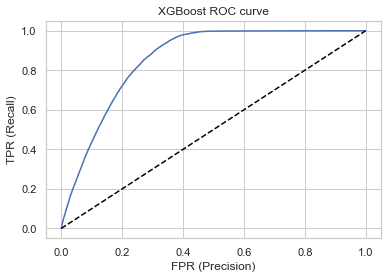

Area under curve (AUC):  0.8571624139488043


In [77]:
y_score = xgb_model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('XGBoost ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

In [78]:
random_state=42
n_iter=50
num_folds=2
kf = KFold(n_splits=num_folds, random_state=random_state,shuffle=True)

In [79]:
def gb_mse_cv(params, random_state=random_state, cv=kf, X=x_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'learning_rate': params['learning_rate'],
              'gamma': params['gamma'],
              'reg_alpha' : params['reg_alpha'],
              'reg_lambda' : params['reg_lambda'],
              'colsample_bytree' : params['colsample_bytree'],
              'min_child_weight' : params['min_child_weight']
             }
            
            
    
    # we use this params to create a new LGBM Regressor
    model = lgb.LGBMClassifier(random_state=42, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="roc_auc", n_jobs=-1).mean()

    return score

In [80]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 200, 1),
       'max_depth' : hp.quniform('max_depth', 2, 8, 1),
       'learning_rate': hp.loguniform("learning_rate",-4,-1),
        'gamma': hp.quniform('gamma',0.1,0.5,0.1),
        'reg_alpha' : hp.quniform('reg_alpha',1.1,1.5,0.1),
        'reg_lambda' : hp.uniform('reg_lambda',1.1,1.5),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.1,0.5),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(random_state) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = lgb.LGBMClassifier(random_state=random_state, n_estimators=int(best['n_estimators']),
                           max_depth=int(best['max_depth']),learning_rate=best['learning_rate'],gamma=best['gamma'],
                           reg_alpha=best['reg_alpha'],reg_lambda=best['reg_lambda'],colsample_bytree=best['colsample_bytree'],
                           min_child_weight=best['min_child_weight'])
model.fit(x_train,y_train)

preds = [pred[1] for pred in model.predict_proba(x_test)]
score = roc_auc_score(y_test, preds, average = 'weighted')

100%|███████████████████████████████████████████████| 50/50 [06:03<00:00,  7.26s/trial, best loss: -0.8576766770082486]
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Wall time: 6min 7s


In [81]:
best

{'colsample_bytree': 0.32863235997079443,
 'gamma': 0.2,
 'learning_rate': 0.06675050607185004,
 'max_depth': 8.0,
 'min_child_weight': 10.0,
 'n_estimators': 169.0,
 'reg_alpha': 1.2000000000000002,
 'reg_lambda': 1.2655026808149903}

In [82]:
print("auc-roc score on Test data",score)

auc-roc score on Test data 0.859109074725836


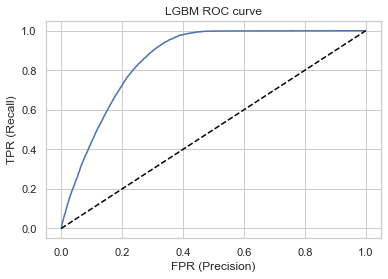

Area under curve (AUC):  0.859109074725836


In [83]:
y_score = model.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('LGBM ROC curve')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print ('Area under curve (AUC): ', auc(fpr,tpr))

# CatBoost

In [89]:
#X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, Y_cat, test_size = 0.22, random_state = 22, stratify = Y_cat, shuffle = True)

cat_model = CatBoostClassifier()
cat_model = cat_model.fit(x_train, y_train, eval_set = (x_test, y_test), early_stopping_rounds = 10, verbose = 100)

predictions = [pred[1] for pred in cat_model.predict_proba(x_test)]
print('Validation ROC AUC Score:', roc_auc_score(y_test, predictions, average = 'weighted'))

Learning rate set to 0.128106
0:	learn: 0.4954884	test: 0.4957812	best: 0.4957812 (0)	total: 174ms	remaining: 2m 53s
100:	learn: 0.2637222	test: 0.2647342	best: 0.2647342 (100)	total: 8.85s	remaining: 1m 18s
Stopped by overfitting detector  (10 iterations wait)

bestTest = 0.2643203138
bestIteration = 158

Shrink model to first 159 iterations.
Validation ROC AUC Score: 0.8583149954584225
